img shape :  (360, 640, 3)


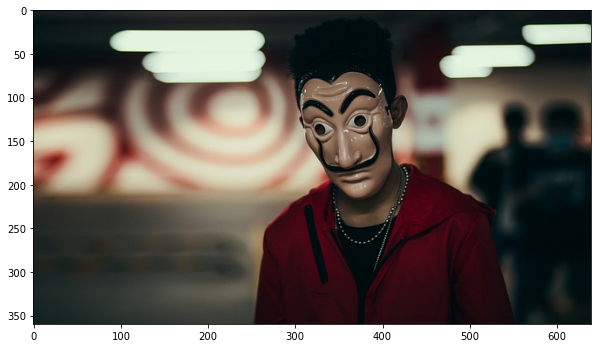

In [1]:
# image load

import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

img = cv2.imread('image/dali.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape : ', img.shape)

plt.figure(figsize = (10, 10))
plt.imshow(img_rgb)
plt.show()

In [2]:
_, regions = selectivesearch.selective_search(img_rgb, scale = 100, min_size = 500)

print(type(regions), len(regions))

<class 'list'> 95


In [3]:
regions

[{'rect': (0, 0, 639, 86), 'size': 17222, 'labels': [0.0]},
 {'rect': (0, 9, 267, 69), 'size': 7460, 'labels': [1.0]},
 {'rect': (295, 10, 134, 124), 'size': 7805, 'labels': [2.0]},
 {'rect': (562, 17, 77, 20), 'size': 1620, 'labels': [3.0]},
 {'rect': (89, 24, 176, 56), 'size': 7314, 'labels': [4.0]},
 {'rect': (147, 28, 156, 112), 'size': 3317, 'labels': [5.0]},
 {'rect': (0, 34, 170, 136), 'size': 7031, 'labels': [6.0]},
 {'rect': (569, 39, 70, 25), 'size': 1423, 'labels': [7.0]},
 {'rect': (468, 41, 106, 35), 'size': 2918, 'labels': [8.0]},
 {'rect': (415, 48, 122, 87), 'size': 2309, 'labels': [9.0]},
 {'rect': (424, 59, 215, 92), 'size': 8074, 'labels': [10.0]},
 {'rect': (137, 70, 116, 11), 'size': 1189, 'labels': [11.0]},
 {'rect': (307, 71, 95, 51), 'size': 2385, 'labels': [12.0]},
 {'rect': (94, 73, 219, 133), 'size': 18086, 'labels': [13.0]},
 {'rect': (99, 76, 71, 93), 'size': 1408, 'labels': [14.0]},
 {'rect': (18, 78, 63, 35), 'size': 1293, 'labels': [15.0]},
 {'rect': (30

In [4]:
cand_rects = [cand['rect'] for cand in regions]

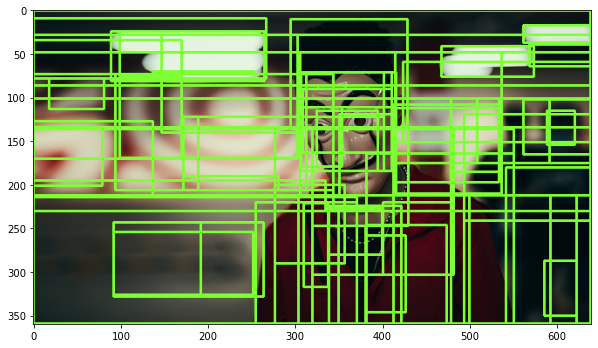

In [5]:
# Visualization of Bounding box

green = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:

    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함
    right = left + rect[2]
    bottom = top + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color = green, thickness = 2)

plt.figure(figsize = (10, 10))
plt.imshow(img_rgb_copy)
plt.show()

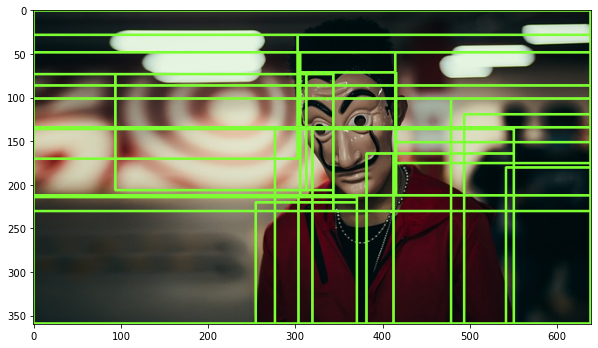

In [6]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:

    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color = green_rgb, thickness = 2)

plt.figure(figsize = (10, 10))
plt.imshow(img_rgb_copy)
plt.show()

In [7]:
import numpy as np

def compute_iou(cand_box, gt_box):
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.maximum(cand_box[2], gt_box[2])
    y2 = np.maximum(cand_box[3], gt_box[3])

    intersection = np.maximum(x2 -x1, 0) * np.maximum(y2 -y1, 0)

    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection

    iou = intersection / union
    return iou

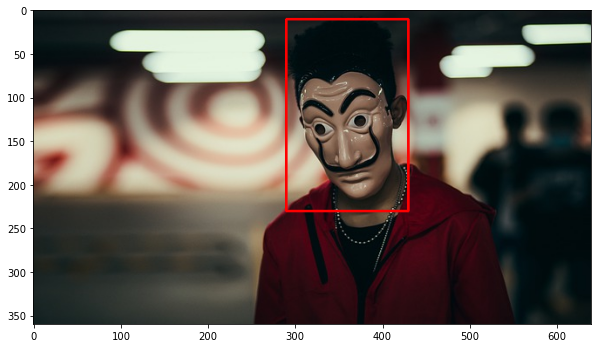

In [57]:
import cv2
import matplotlib.pyplot as plt

# 실제 box(ground truth)의 좌표를 아래와 같다고 가정
gt_box = [290, 10, 430, 230]

img = cv2.imread('image/dali.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0, 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color = red, thickness = 2)

plt.figure(figsize = (10, 10))
plt.imshow(img_rgb)
plt.show()

In [58]:
import selectivesearch

img = cv2.imread('image/dali.jpg')
img_rgb2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_, regions = selectivesearch.selective_search(img_rgb2, scale = 200, min_size = 2000)

print(type(regions), len(regions))

<class 'list'> 37


In [59]:
[cand['rect'] for cand in regions]

[(0, 0, 639, 173),
 (294, 9, 134, 126),
 (88, 24, 177, 59),
 (412, 39, 227, 179),
 (468, 41, 106, 35),
 (0, 64, 339, 163),
 (309, 72, 107, 141),
 (0, 73, 97, 66),
 (500, 102, 139, 257),
 (555, 104, 84, 61),
 (0, 130, 87, 72),
 (309, 136, 121, 177),
 (0, 139, 89, 71),
 (401, 159, 149, 200),
 (254, 210, 140, 149),
 (0, 217, 299, 142),
 (381, 234, 100, 125),
 (343, 241, 71, 118),
 (142, 249, 122, 99),
 (254, 210, 227, 149),
 (309, 136, 241, 223),
 (0, 210, 481, 149),
 (500, 102, 139, 257),
 (309, 39, 330, 179),
 (0, 64, 339, 163),
 (0, 136, 550, 223),
 (0, 64, 339, 163),
 (0, 64, 339, 163),
 (0, 39, 639, 188),
 (0, 0, 639, 173),
 (0, 39, 639, 188),
 (0, 0, 639, 359),
 (0, 136, 550, 223),
 (0, 136, 550, 223),
 (0, 24, 639, 203),
 (0, 0, 639, 359),
 (0, 0, 639, 359)]

In [61]:
cand_rects = [cand['rect'] for cand in regions]

for index, cand_box  in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]

iou = compute_iou(cand_box, gt_box)
print('index: ', index, "iou: ", iou)

index:  36 iou:  0.8800650289017341


In [62]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 639, 173),
 (0, 0, 639, 173),
 (0, 0, 639, 359),
 (0, 0, 639, 359),
 (0, 0, 639, 359),
 (0, 24, 639, 203),
 (0, 39, 639, 188),
 (0, 39, 639, 188),
 (0, 64, 339, 163),
 (0, 64, 339, 163),
 (0, 64, 339, 163),
 (0, 64, 339, 163),
 (0, 136, 550, 223),
 (0, 136, 550, 223),
 (0, 136, 550, 223),
 (0, 210, 481, 149),
 (0, 217, 299, 142),
 (88, 24, 177, 59),
 (254, 210, 140, 149),
 (254, 210, 227, 149),
 (294, 9, 134, 126),
 (309, 39, 330, 179),
 (309, 72, 107, 141),
 (309, 136, 121, 177),
 (309, 136, 241, 223),
 (381, 234, 100, 125),
 (401, 159, 149, 200),
 (412, 39, 227, 179),
 (500, 102, 139, 257),
 (500, 102, 139, 257)]

img shape:  (360, 640, 3)
index: 0 iou: 2.175656460327993 rectangle" (0, 173, 639, 173)
index: 1 iou: 1.2437293803949925 rectangle" (294, 135, 428, 126)
index: 2 iou: 4.959138187221397 rectangle" (88, 83, 265, 59)
index: 4 iou: 0.8805841924398625 rectangle" (0, 227, 339, 163)
index: 5 iou: 0.5523177035413774 rectangle" (309, 213, 416, 141)
index: 6 iou: 2.1016634018393705 rectangle" (0, 139, 97, 66)
index: 8 iou: 0.9912926992632284 rectangle" (0, 202, 87, 72)
index: 19 iou: 0.988427501701838 rectangle" (309, 218, 639, 179)
index: 20 iou: 0.8805841924398625 rectangle" (0, 227, 339, 163)
index: 22 iou: 0.8805841924398625 rectangle" (0, 227, 339, 163)
index: 23 iou: 0.8805841924398625 rectangle" (0, 227, 339, 163)
index: 24 iou: 1.7253353526611857 rectangle" (0, 227, 639, 188)
index: 25 iou: 2.175656460327993 rectangle" (0, 173, 639, 173)
index: 26 iou: 1.7253353526611857 rectangle" (0, 227, 639, 188)
index: 30 iou: 1.2821770238765173 rectangle" (0, 227, 639, 203)


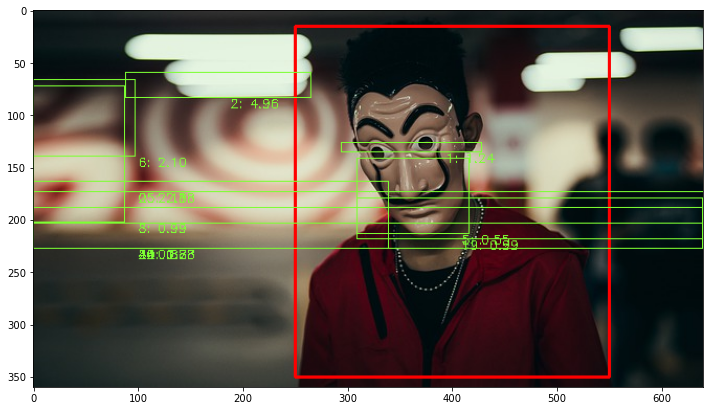

In [63]:
img = cv2.imread('image/dali.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape: ', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
gt_box = [250, 15, 550, 350]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color = red, thickness = 2)

for index, cand_box in enumerate(cand_rects):

    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[1] += cand_box[3]
    
    iou = compute_iou(cand_box, gt_box)

    if iou > 0.5:
        print('index:', index, "iou:", iou, 'rectangle"', (cand_box[0], cand_box[1], cand_box[2], cand_box[3]))
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2],  cand_box[3]), color = green_rgb, thickness = 1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0] + 100, cand_box[1] + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color = green_rgb, thickness = 1)

plt.figure(figsize = (12, 12))
plt.imshow(img_rgb)
plt.show()